In [2]:
import numpy as np
import pandas as pd 
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,LinearRegression
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,kneighbors_graph,KNeighborsTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import *
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neural_network import * 
from sklearn.svm import SVC , SVR
from sklearn.preprocessing import StandardScaler
import sys
import sklearn
import matplotlib
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# z = (x - u) / s

In [50]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [29]:
data =pd.read_csv('movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [30]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [38]:
data['director_facebook_likes'].fillna(0,inplace=True)
data['actor_3_facebook_likes'].fillna(0,inplace=True)

In [39]:
data['director_facebook_likes'].value_counts()

director_facebook_likes
0.0      1011
3.0        70
6.0        66
7.0        64
2.0        63
         ... 
593.0       1
434.0       1
482.0       1
667.0       1
291.0       1
Name: count, Length: 435, dtype: int64

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

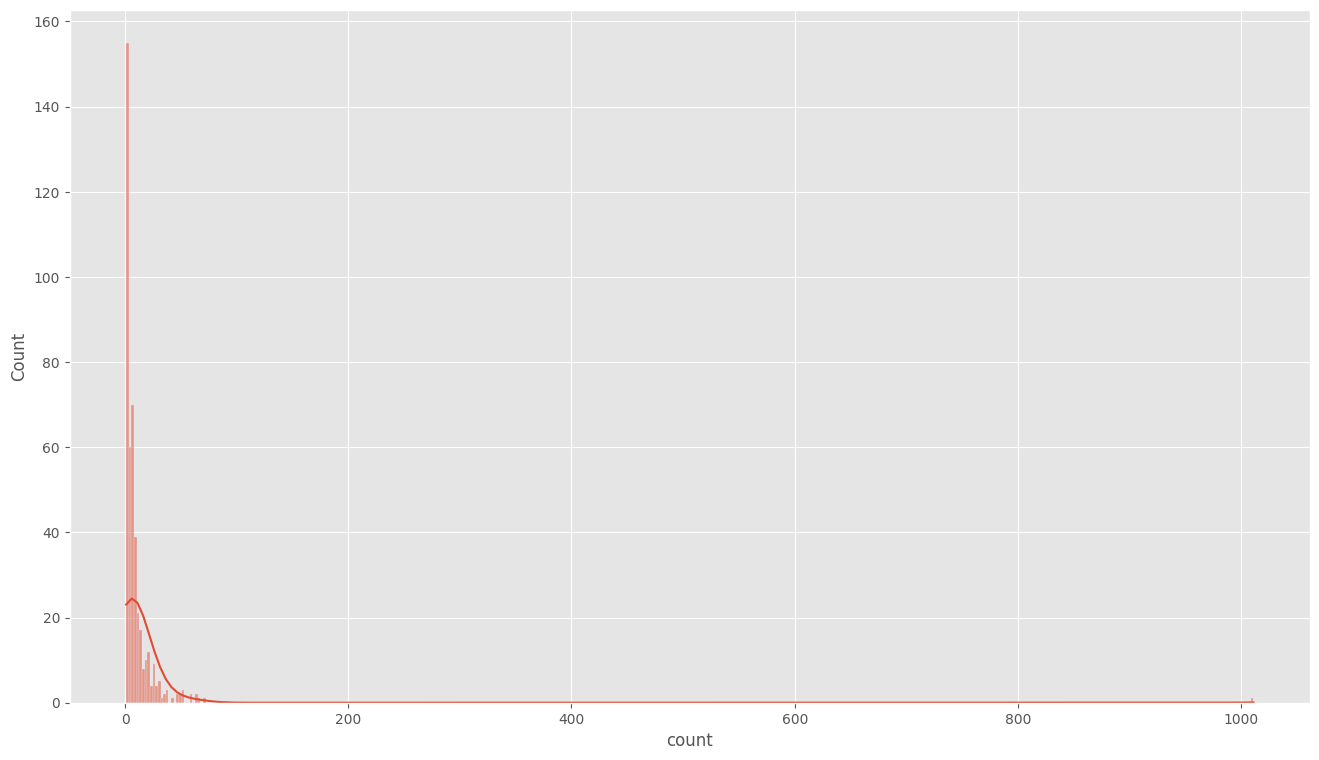

In [40]:
sns.histplot(data['director_facebook_likes'].value_counts(),kde=True)

In [41]:
new_data = data.iloc[:,4:6]
new_data.head()

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,0.0


In [35]:
from sklearn.cluster import KMeans # Using Kmean Clustring from sklearn

In [42]:
kmean = KMeans(n_clusters=5)

In [43]:
kmean.fit(new_data)

KMeans(n_clusters=5)

In [44]:
kmean.cluster_centers_

array([[  150.22659686,   420.43748691],
       [13693.33333333,   555.88      ],
       [  210.77011494, 11126.43678161],
       [20400.        ,   948.9       ],
       [17545.45454545, 14545.45454545]])

In [45]:
print(kmean.labels_)
print(len(kmean.labels_))

[0 0 0 ... 0 0 0]
5043


In [48]:
print(type(kmean.labels_))
unique,counts = np.unique(kmean.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 4775, 1: 150, 2: 87, 3: 20, 4: 11}


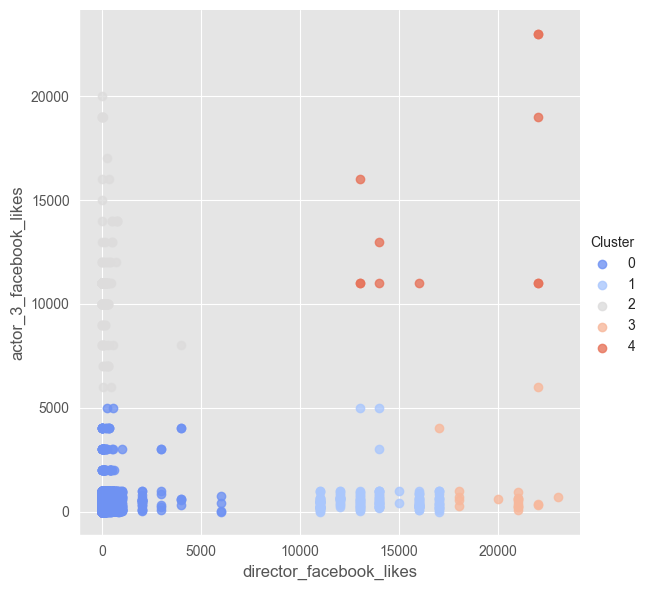

In [56]:
new_data['Cluster'] = kmean.labels_
sns.lmplot(x='director_facebook_likes',y='actor_3_facebook_likes',data = new_data,hue='Cluster',
           palette='coolwarm',fit_reg=False,height=6,aspect=1) # palette ='viridis
# markers=['o','s','^']

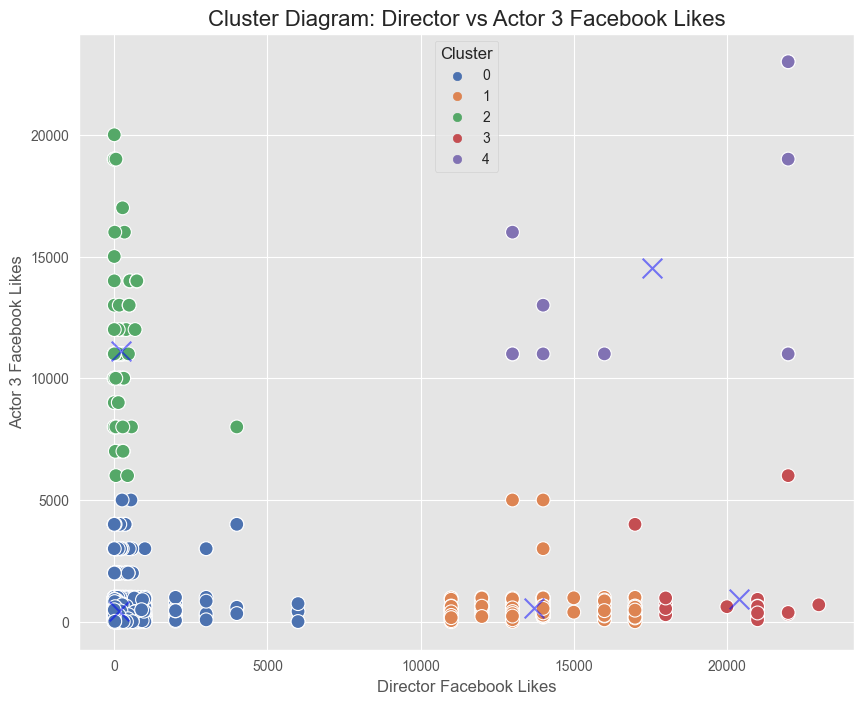

In [71]:
# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=new_data, 
                x='director_facebook_likes', 
                y='actor_3_facebook_likes', 
                hue='Cluster', 
                palette='deep',
                legend='full',
                s=100)  # s is the size of the points

# Customize the plot
plt.title('Cluster Diagram: Director vs Actor 3 Facebook Likes', fontsize=16)
plt.xlabel('Director Facebook Likes', fontsize=12)
plt.ylabel('Actor 3 Facebook Likes', fontsize=12)

# Add a legend
plt.legend(title='Cluster', title_fontsize='12', fontsize='10')

# Assuming 'kmean' is your fitted K-means model
centroids = kmean.cluster_centers_

# After creating the scatter plot and before plt.show(), add:
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=200, alpha=0.5, marker='x')

# Show the plot
plt.show()


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


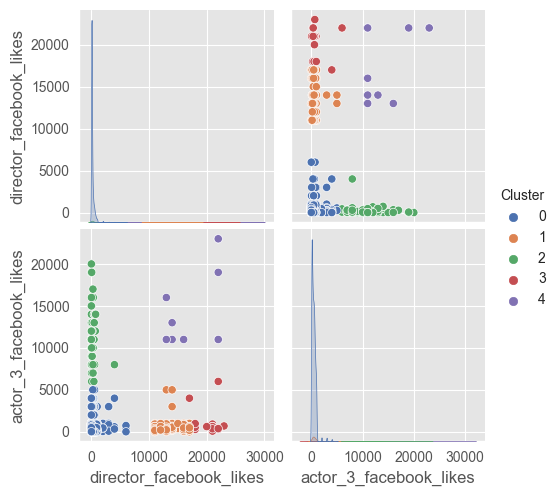

In [74]:
sns.pairplot(new_data, hue='Cluster', palette='deep', 
             vars=['director_facebook_likes', 'actor_3_facebook_likes']) # 'actor_1_facebook_likes', 'actor_2_facebook_likes'
plt.show()

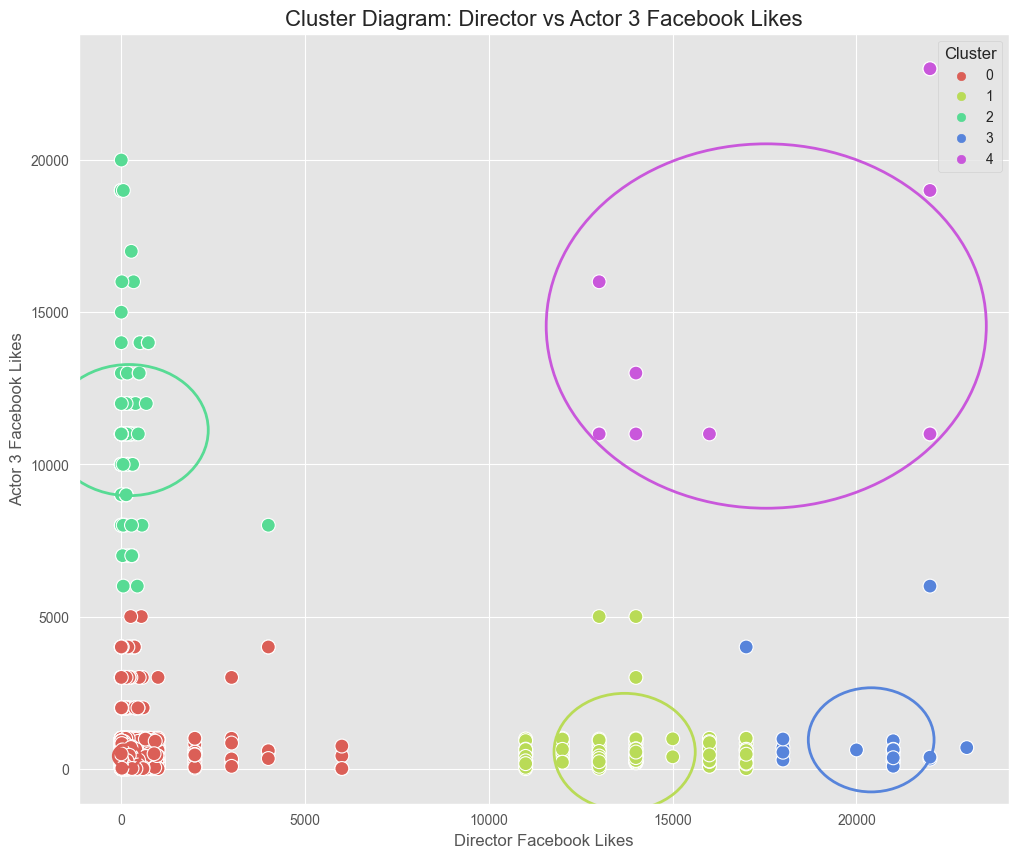

In [78]:
from matplotlib.patches import Circle

# Assuming you've already performed K-means clustering and have the labels in new_data['Cluster']

# Create a color palette
n_clusters = len(new_data['Cluster'].unique())
color_palette = sns.color_palette("hls", n_clusters)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 10))

scatter = sns.scatterplot(data=new_data, 
                x='director_facebook_likes', 
                y='actor_3_facebook_likes', 
                hue='Cluster', 
                palette=color_palette,
                legend='full',
                s=100,
                ax=ax)

# Customize the plot
plt.title('Cluster Diagram: Director vs Actor 3 Facebook Likes', fontsize=16)
plt.xlabel('Director Facebook Likes', fontsize=12)
plt.ylabel('Actor 3 Facebook Likes', fontsize=12)

# Add a legend
plt.legend(title='Cluster', title_fontsize='12', fontsize='10')

# Function to draw a circle
def draw_circle(x, y, radius, ax=None, **kwargs):
    circle = Circle((x, y), radius, fill=False, **kwargs)
    if ax is None:
        ax = plt.gca()
    ax.add_artist(circle)

# Draw circles around clusters
for i in range(n_clusters):
    cluster_points = new_data[new_data['Cluster'] == i]
    center_x = cluster_points['director_facebook_likes'].mean()
    center_y = cluster_points['actor_3_facebook_likes'].mean()
    
    # Calculate radius (you might need to adjust this based on your data)
    radius = np.mean(np.sqrt((cluster_points['director_facebook_likes'] - center_x)**2 + 
                             (cluster_points['actor_3_facebook_likes'] - center_y)**2))
    
    draw_circle(center_x, center_y, radius, ax=ax, edgecolor=color_palette[i], linewidth=2)

# Show the plot
plt.show()

In [58]:
x,y = data['director_facebook_likes'],data['actor_3_facebook_likes']

0           0.0
1         563.0
2           0.0
3       22000.0
4         131.0
         ...   
5038        2.0
5039        0.0
5040        0.0
5041        0.0
5042       16.0
Name: director_facebook_likes, Length: 5043, dtype: float64

In [64]:
# x,y = data['director_facebook_likes'],data['actor_3_facebook_likes']
# plt.scatter(data[:,['']], x[:,1], s=50)
# plt.show()

In [ ]:
''' 
Certainly! The Apriori algorithm is a classic algorithm used in data mining for 
finding frequent itemsets and generating association rules. It's commonly used 
in market basket analysis to discover relationships between products that are 
frequently purchased together. Let's break down the key aspects of the Apriori algorithm:

Purpose:

To find frequent itemsets in a transaction database
To generate association rules from these frequent itemsets


Key Concepts:

Support: The fraction of transactions that contain an itemset
Confidence: The likelihood that an item Y is purchased when item X is purchased
Lift: The ratio of the observed support to the expected support if X and Y were independent


Algorithm Steps:
a. Set a minimum support threshold
b. Generate frequent 1-itemsets
c. Generate candidate k-itemsets from frequent (k-1)-itemsets
d. Prune candidate itemsets using the Apriori property
e. Scan the database to determine support of candidate itemsets
f. Eliminate itemsets that don't meet the minimum support threshold
g. Repeat steps c-f until no more frequent itemsets are found
Apriori Property:

If an itemset is frequent, then all of its subsets must also be frequent
This property is used to prune the search space


Pseudocode:

L1 = {frequent 1-itemsets}
for (k = 2; Lk-1 ≠ ∅; k++) do
    Ck = generate_candidates(Lk-1)
    for each transaction t in database do
        increment count of all candidates in Ck that are contained in t
    Lk = candidates in Ck with min_support
    return ∪k Lk
    
    dvantages:

Easy to implement
Uses large itemset property
Easily parallelizable


Disadvantages:

Can be slow with large datasets
Multiple database scans required


Example Implementation in Python:
Here's a simple implementation using the mlxtend library:
'''

In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Assume 'df' is your transaction database
# Each row is a transaction, each column is an item
# Values are boolean (True if item is in transaction, False otherwise)

In [3]:
#Dataset Loading
df = pd.read_csv('Online_retail.csv',encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [7]:
# Deleting error data
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

#deleting null data
df = df[df['CustomerID'].notnull()]

print(df.shape)
df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
data =df[df['Country']=='France'].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
data

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
def encode_unit(x):
    if x<=0:
        return 0
    else:
        return 1
    

In [10]:
clear_output = data.applymap(encode_unit)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7812\2866514084.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  clear_output = data.applymap(encode_unit)


In [11]:
clear_output

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Find frequent itemsets
frequent_itemsets = apriori(clear_output, min_support=0.07, use_colnames=True)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [14]:
frequent_itemsets

,support,itemsets
0,0.071979,(4 TRADITIONAL SPINNING TOPS)
1,0.097686,(ALARM CLOCK BAKELIKE GREEN)
2,0.102828,(ALARM CLOCK BAKELIKE PINK)
3,0.095116,(ALARM CLOCK BAKELIKE RED )
4,0.077121,(BAKING SET 9 PIECE RETROSPOT )
...,...,...
85,0.084833,"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS, SET/20 ..."
86,0.084833,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES, SET/2..."
87,0.102828,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT..."
88,0.100257,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT..."


In [16]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.097686,0.102828,0.074550,0.763158,7.421711,0.064505,3.788061,0.958935
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102828,0.097686,0.074550,0.725000,7.421711,0.064505,3.281140,0.964430
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.097686,0.095116,0.079692,0.815789,8.576814,0.070400,4.912229,0.979046
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.095116,0.097686,0.079692,0.837838,8.576814,0.070400,5.564267,0.976265
4,(ALARM CLOCK BAKELIKE GREEN),(POSTAGE),0.097686,0.771208,0.084833,0.868421,1.126053,0.009496,1.738817,0.124061


In [17]:
rules[(rules['lift']>=7) & (rules['confidence']>=0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.097686,0.102828,0.074550,0.763158,7.421711,0.064505,3.788061,0.958935
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102828,0.097686,0.074550,0.725000,7.421711,0.064505,3.281140,0.964430
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.097686,0.095116,0.079692,0.815789,8.576814,0.070400,4.912229,0.979046
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.095116,0.097686,0.079692,0.837838,8.576814,0.070400,5.564267,0.976265
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.095116,0.102828,0.074550,0.783784,7.622297,0.064770,4.149422,0.960129
6,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.102828,0.095116,0.074550,0.725000,7.622297,0.064770,3.290488,0.968383
45,"(ALARM CLOCK BAKELIKE GREEN, POSTAGE)",(ALARM CLOCK BAKELIKE RED ),0.084833,0.095116,0.071979,0.848485,8.920557,0.063910,5.972237,0.970205
46,"(ALARM CLOCK BAKELIKE RED , POSTAGE)",(ALARM CLOCK BAKELIKE GREEN),0.087404,0.097686,0.071979,0.823529,8.430341,0.063441,5.113111,0.965795
47,(ALARM CLOCK BAKELIKE GREEN),"(ALARM CLOCK BAKELIKE RED , POSTAGE)",0.097686,0.087404,0.071979,0.736842,8.430341,0.063441,3.467866,0.976801
48,(ALARM CLOCK BAKELIKE RED ),"(ALARM CLOCK BAKELIKE GREEN, POSTAGE)",0.095116,0.084833,0.071979,0.756757,8.920557,0.063910,3.762354,0.981230
